# `***DATA LOADING AND BASIC EXPLORATION***`

All necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, ttest_ind, pearsonr, spearmanr
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_excel('/content/Students_Performance_data_set.xlsx')


In [ ]:
print("DATASET OVERVIEW")
print(f"Dataset Shape: {df.shape}")
print(f"Total Rows: {df.shape}")
print(f"Total Columns: {df.shape}")


DATASET OVERVIEW
Dataset Shape: (1193, 24)
Total Rows: (1193, 24)
Total Columns: (1193, 24)


In [ ]:
# Display first few rows

print("FIRST 5 ROWS OF DATA")

print(df.head())


FIRST 5 ROWS OF DATA
   admission_year  gender  age  curr_sem scholarship transportation  \
0            2018    Male   24        12         Yes             No   
1            2021    Male   22         4         Yes            Yes   
2            2020  Female   21         5          No             No   
3            2021    Male   20         4         Yes             No   
4            2021    Male   22         4         Yes             No   

   hrs_study learning_mode phone   pc  ...                skills skill_dev  \
0          3       Offline   Yes  Yes  ...  Software Development         2   
1          3        Online   Yes  Yes  ...       Web development         2   
2          3       Offline   Yes  Yes  ...           Programming         1   
3          1       Offline   Yes  Yes  ...           Programming         1   
4          3        Online   Yes  Yes  ...           Programming         1   

           interested_area  relationship    living  health_issues prev_sgpa  \
0   

In [ ]:
# Display data types

print("DATA TYPES")

print(df.dtypes)


DATA TYPES
admission_year       int64
gender              object
age                  int64
curr_sem             int64
scholarship         object
transportation      object
hrs_study            int64
learning_mode       object
phone               object
pc                  object
social_media         int64
english             object
attendance          object
suspension          object
skills              object
skill_dev            int64
interested_area     object
relationship        object
living              object
health_issues       object
prev_sgpa          float64
current_cgpa       float64
credits              int64
income               int64
dtype: object


In [ ]:
# Display column names

print("COLUMN NAMES")

for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")


COLUMN NAMES
1. admission_year
2. gender
3. age
4. curr_sem
5. scholarship
6. transportation
7. hrs_study
8. learning_mode
9. phone
10. pc
11. social_media
12. english
13. attendance
14. suspension
15. skills
16. skill_dev
17. interested_area
18. relationship
19. living
20. health_issues
21. prev_sgpa
22. current_cgpa
23. credits
24. income


In [ ]:
# Get statistical summary

print("STATISTICAL SUMMARY (NUMERICAL COLUMNS)")

print(df.describe())

STATISTICAL SUMMARY (NUMERICAL COLUMNS)
       admission_year          age     curr_sem    hrs_study  social_media  \
count     1193.000000  1193.000000  1193.000000  1193.000000   1193.000000   
mean      2020.516345    21.342833     6.535624     3.131601      3.290025   
std          1.354811     1.613903     3.809289     1.650284      2.290492   
min       2013.000000    18.000000     1.000000     0.000000      0.000000   
25%       2020.000000    20.000000     3.000000     2.000000      2.000000   
50%       2021.000000    21.000000     7.000000     3.000000      3.000000   
75%       2022.000000    22.000000    10.000000     4.000000      4.000000   
max       2023.000000    27.000000    24.000000    13.000000     20.000000   

         skill_dev    prev_sgpa  current_cgpa      credits        income  
count  1193.000000  1193.000000   1193.000000  1193.000000  1.193000e+03  
mean      2.185247     2.682994      3.165194    71.837385  6.251535e+04  
std       1.296634     0.871333 

In [ ]:
# Check for missing values

print("MISSING VALUES ANALYSIS")

missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_count.values,
    'Missing_Percentage': missing_percent.values
})
print(missing_df)

MISSING VALUES ANALYSIS
             Column  Missing_Count  Missing_Percentage
0    admission_year              0            0.000000
1            gender              0            0.000000
2               age              0            0.000000
3          curr_sem              0            0.000000
4       scholarship              0            0.000000
5    transportation              0            0.000000
6         hrs_study              0            0.000000
7     learning_mode              0            0.000000
8             phone              0            0.000000
9                pc              0            0.000000
10     social_media              0            0.000000
11          english              0            0.000000
12       attendance              0            0.000000
13       suspension              0            0.000000
14           skills              1            0.083822
15        skill_dev              0            0.000000
16  interested_area              0       

In [ ]:
# Check for duplicate rows

print("DUPLICATE ROWS ANALYSIS")

duplicate_rows = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_rows}")
if duplicate_rows > 0:
    print(f"Duplicate rows found: {duplicate_rows}")
    print("Duplicated rows sample:")
    print(df[df.duplicated(keep=False)].head())


DUPLICATE ROWS ANALYSIS
Total Duplicate Rows: 0


# `DATA PREPROCESSING AND CLEANING


In [ ]:
# Create a copy for preprocessing
df_clean = df.copy()


print("DATA PREPROCESSING & CLEANING")



# Handle missing values
print("\nHandling Missing Values...")

# Clean 'attendance' column
df_clean['attendance'] = pd.to_numeric(df_clean['attendance'], errors='coerce')


# For numerical columns, fill with median

numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col]=df_clean[col].fillna(df_clean[col].median())
        print(f"Filled {col} with median value")

# For categorical columns, fill with mode

categorical_cols = df_clean.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col]=df_clean[col].fillna(df_clean[col].mode()[0])
        print(f"Filled {col} with mode value")



DATA PREPROCESSING & CLEANING

Handling Missing Values...
Filled attendance with median value
Filled skills with mode value


In [ ]:
# Remove duplicate rows

print("\nRemoving Duplicate Rows...")
initial_rows = len(df_clean)
df_clean.drop_duplicates(inplace=True)
removed_duplicates = initial_rows - len(df_clean)
print(f"Removed {removed_duplicates} duplicate rows")


Removing Duplicate Rows...
Removed 0 duplicate rows


In [ ]:
# Handle outliers in numerical columns using IQR method
print("\nHandling Outliers using IQR Method...")
for col in ['age', 'hrs_study', 'attendance', 'prev_sgpa', 'current_cgpa', 'income']:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_count = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        if outlier_count > 0:
            print(f"{col}: Found {outlier_count} outliers (bounds: {lower_bound:.2f} to {upper_bound:.2f})")
            # Cap outliers instead of removing (better for small datasets)
            df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)






Handling Outliers using IQR Method...
age: Found 13 outliers (bounds: 17.00 to 25.00)
hrs_study: Found 22 outliers (bounds: -1.00 to 7.00)
attendance: Found 36 outliers (bounds: 50.00 to 130.00)
prev_sgpa: Found 40 outliers (bounds: 0.43 to 5.15)
current_cgpa: Found 45 outliers (bounds: 1.74 to 4.83)
income: Found 61 outliers (bounds: -36000.00 to 140000.00)


In [ ]:
# Data type consistency
print("\nEnsuring Data Type Consistency...")
df_clean['admission_year'] = df_clean['admission_year'].astype('int64')


Ensuring Data Type Consistency...


In [ ]:
# Create a validation report
print(f"Final Dataset Shape: {df_clean.shape}")
print(f"Final Rows: {len(df_clean)}")
print(f"Final Columns: {len(df_clean.columns)}")
print(f"Missing Values Remaining: {df_clean.isnull().sum().sum()}")
print("Data Cleaning Complete!\n")



Final Dataset Shape: (1193, 24)
Final Rows: 1193
Final Columns: 24
Missing Values Remaining: 0
Data Cleaning Complete!



In [ ]:
# Display cleaned data summary
print("\nCleaned Data Statistical Summary:")
print(df_clean.describe())


Cleaned Data Statistical Summary:
       admission_year          age     curr_sem    hrs_study  social_media  \
count     1193.000000  1193.000000  1193.000000  1193.000000   1193.000000   
mean      2020.516345    21.331098     6.535624     3.102263      3.290025   
std          1.354811     1.582787     3.809289     1.556951      2.290492   
min       2013.000000    18.000000     1.000000     0.000000      0.000000   
25%       2020.000000    20.000000     3.000000     2.000000      2.000000   
50%       2021.000000    21.000000     7.000000     3.000000      3.000000   
75%       2022.000000    22.000000    10.000000     4.000000      4.000000   
max       2023.000000    25.000000    24.000000     7.000000     20.000000   

        attendance    skill_dev    prev_sgpa  current_cgpa      credits  \
count  1193.000000  1193.000000  1193.000000   1193.000000  1193.000000   
mean     88.750629     2.185247     2.697301      3.225516    71.837385   
std      13.478950     1.296634     0

## *`EXPLORATORY DATA ANALYSIS`*

EXPLORATORY DATA ANALYSIS (EDA)

Target Variable Analysis: current_cgpa
Mean: 3.23
Median: 3.21
Std Dev: 0.53
Min: 1.74
Max: 4.00
Skewness: -0.80
Kurtosis: 0.45


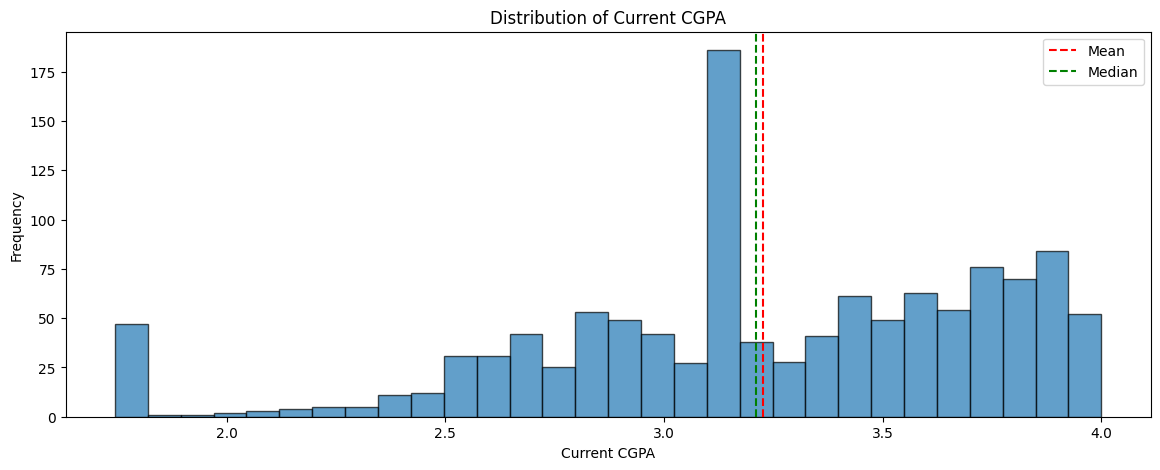

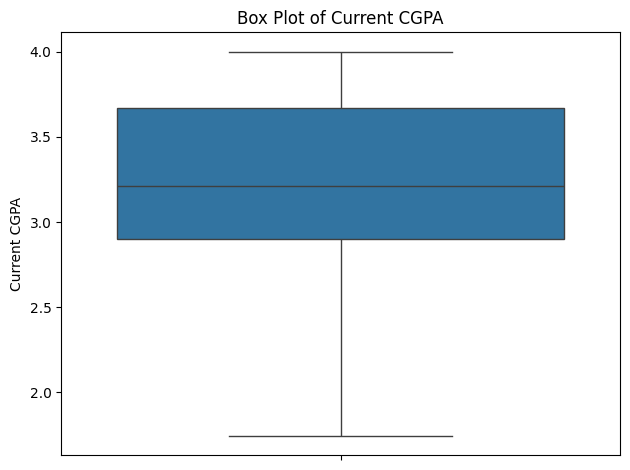


Target variable distribution plot saved!


In [ ]:

print("EXPLORATORY DATA ANALYSIS (EDA)")


# Understand the target variable (current_cgpa)

print("\nTarget Variable Analysis: current_cgpa")

print(f"Mean: {df_clean['current_cgpa'].mean():.2f}")
print(f"Median: {df_clean['current_cgpa'].median():.2f}")
print(f"Std Dev: {df_clean['current_cgpa'].std():.2f}")
print(f"Min: {df_clean['current_cgpa'].min():.2f}")
print(f"Max: {df_clean['current_cgpa'].max():.2f}")
print(f"Skewness: {df_clean['current_cgpa'].skew():.2f}")
print(f"Kurtosis: {df_clean['current_cgpa'].kurtosis():.2f}")

# Visualize target variable distribution

plt.figure(figsize=(14,5))
# Histogram
plt.hist(df_clean['current_cgpa'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Current CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of Current CGPA')
plt.axvline(df_clean['current_cgpa'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df_clean['current_cgpa'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.savefig('target_variable_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

# Box plot
sns.boxplot(df_clean['current_cgpa'], vert=True)
plt.ylabel('Current CGPA')
plt.title('Box Plot of Current CGPA')
plt.tight_layout()
plt.savefig('target_variable_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTarget variable distribution plot saved!")



In [ ]:
# Categorical variables analysis

print("CATEGORICAL VARIABLES ANALYSIS")

categorical_features = ['gender', 'scholarship', 'transportation', 'learning_mode',
                        'phone', 'pc', 'english', 'suspension', 'relationship', 'living', 'health_issues']

for col in categorical_features:
    if col in df_clean.columns:
        print(f"\n{col}:")
        print(df_clean[col].value_counts())
        print(f"Unique Values: {df_clean[col].nunique()}")



CATEGORICAL VARIABLES ANALYSIS

gender:
gender
Male      672
Female    521
Name: count, dtype: int64
Unique Values: 2

scholarship:
scholarship
No     670
Yes    523
Name: count, dtype: int64
Unique Values: 2

transportation:
transportation
No     696
Yes    497
Name: count, dtype: int64
Unique Values: 2

learning_mode:
learning_mode
Offline    857
Online     336
Name: count, dtype: int64
Unique Values: 2

phone:
phone
Yes    1177
No       16
Name: count, dtype: int64
Unique Values: 2

pc:
pc
Yes    1094
No       99
Name: count, dtype: int64
Unique Values: 2

english:
english
Intermediate    669
Basic           304
Advance         220
Name: count, dtype: int64
Unique Values: 3

suspension:
suspension
No     1147
Yes      46
Name: count, dtype: int64
Unique Values: 2

relationship:
relationship
Single               895
Relationship         186
Married               96
Engaged               15
In a relationship      1
Name: count, dtype: int64
Unique Values: 5

living:
living
Family     

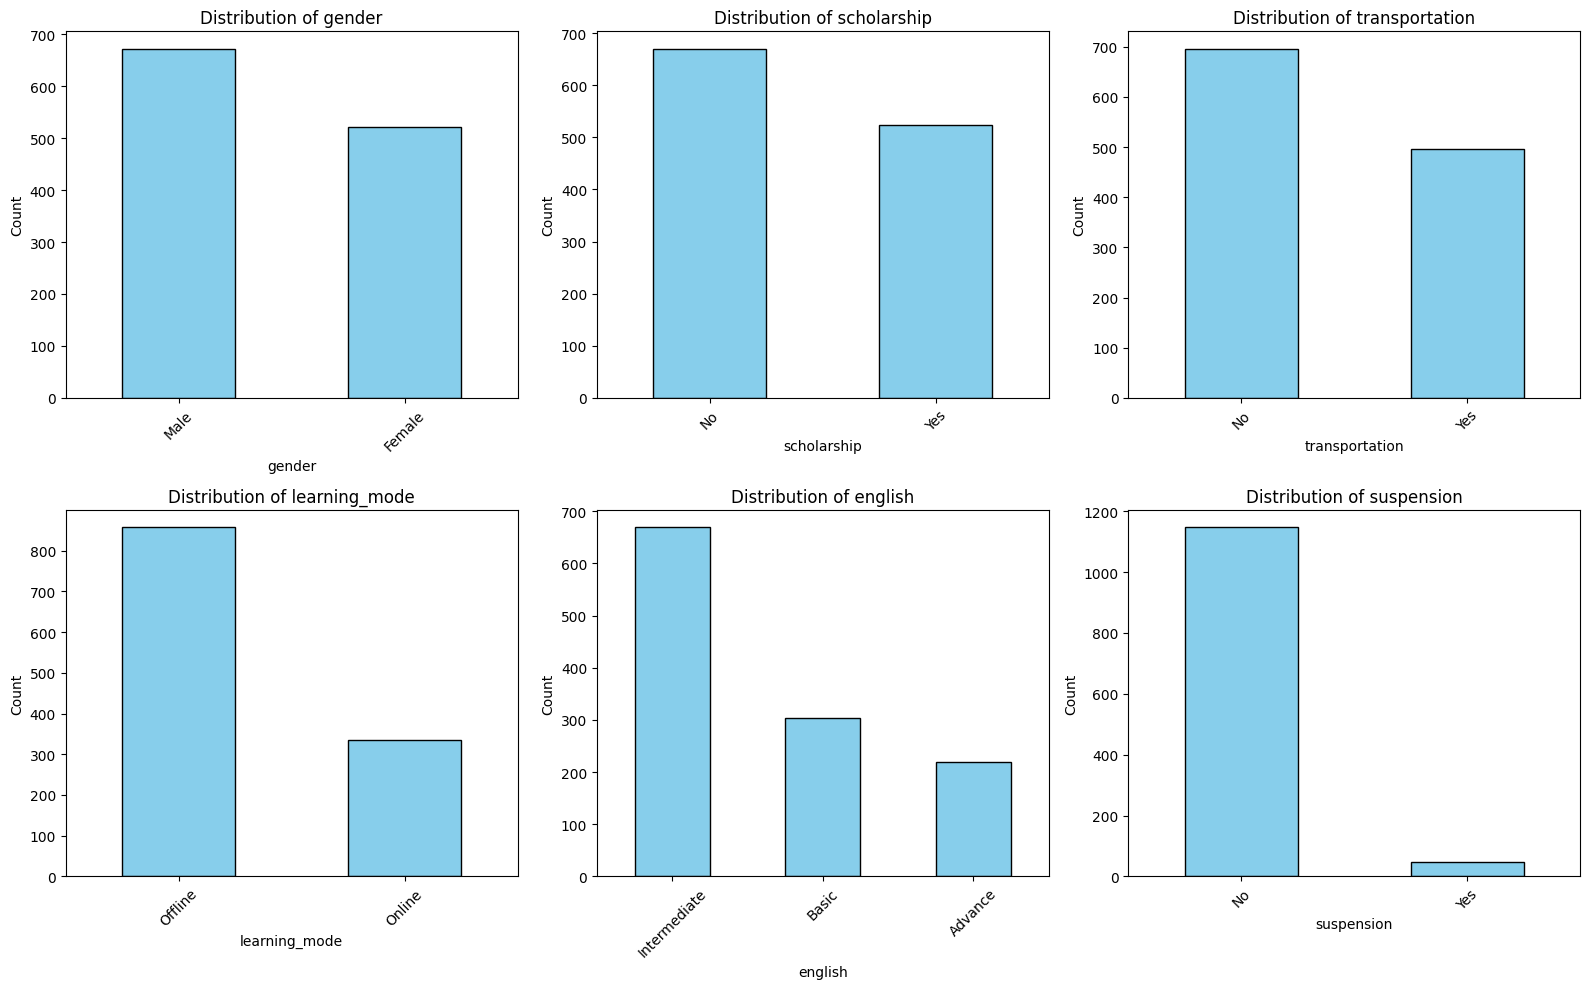


Categorical distributions plot saved!


In [ ]:
# Visualize categorical distributions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

plot_cols = ['gender', 'scholarship', 'transportation', 'learning_mode', 'english', 'suspension']
for idx, col in enumerate(plot_cols):
    if col in df_clean.columns:
        df_clean[col].value_counts().plot(kind='bar', ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCategorical distributions plot saved!")



In [ ]:
# Numerical variables analysis

print("NUMERICAL VARIABLES ANALYSIS")


numerical_features = ['age', 'curr_sem', 'hrs_study', 'social_media', 'attendance',
                     'skill_dev', 'prev_sgpa', 'credits', 'income']

for col in numerical_features:
    if col in df_clean.columns:
        print(f"\n{col}:")
        print(f"  Mean: {df_clean[col].mean():.2f}")
        print(f"  Median: {df_clean[col].median():.2f}")
        print(f"  Std Dev: {df_clean[col].std():.2f}")
        print(f"  Range: {df_clean[col].min():.2f} to {df_clean[col].max():.2f}")



NUMERICAL VARIABLES ANALYSIS

age:
  Mean: 21.33
  Median: 21.00
  Std Dev: 1.58
  Range: 18.00 to 25.00

curr_sem:
  Mean: 6.54
  Median: 7.00
  Std Dev: 3.81
  Range: 1.00 to 24.00

hrs_study:
  Mean: 3.10
  Median: 3.00
  Std Dev: 1.56
  Range: 0.00 to 7.00

social_media:
  Mean: 3.29
  Median: 3.00
  Std Dev: 2.29
  Range: 0.00 to 20.00

attendance:
  Mean: 88.75
  Median: 92.50
  Std Dev: 13.48
  Range: 50.00 to 100.00

skill_dev:
  Mean: 2.19
  Median: 2.00
  Std Dev: 1.30
  Range: 0.00 to 12.00

prev_sgpa:
  Mean: 2.70
  Median: 2.68
  Std Dev: 0.83
  Range: 0.43 to 4.00

credits:
  Mean: 71.84
  Median: 78.00
  Std Dev: 48.09
  Range: 0.00 to 145.00

income:
  Mean: 56725.74
  Median: 50000.00
  Std Dev: 33225.98
  Range: 4000.00 to 140000.00


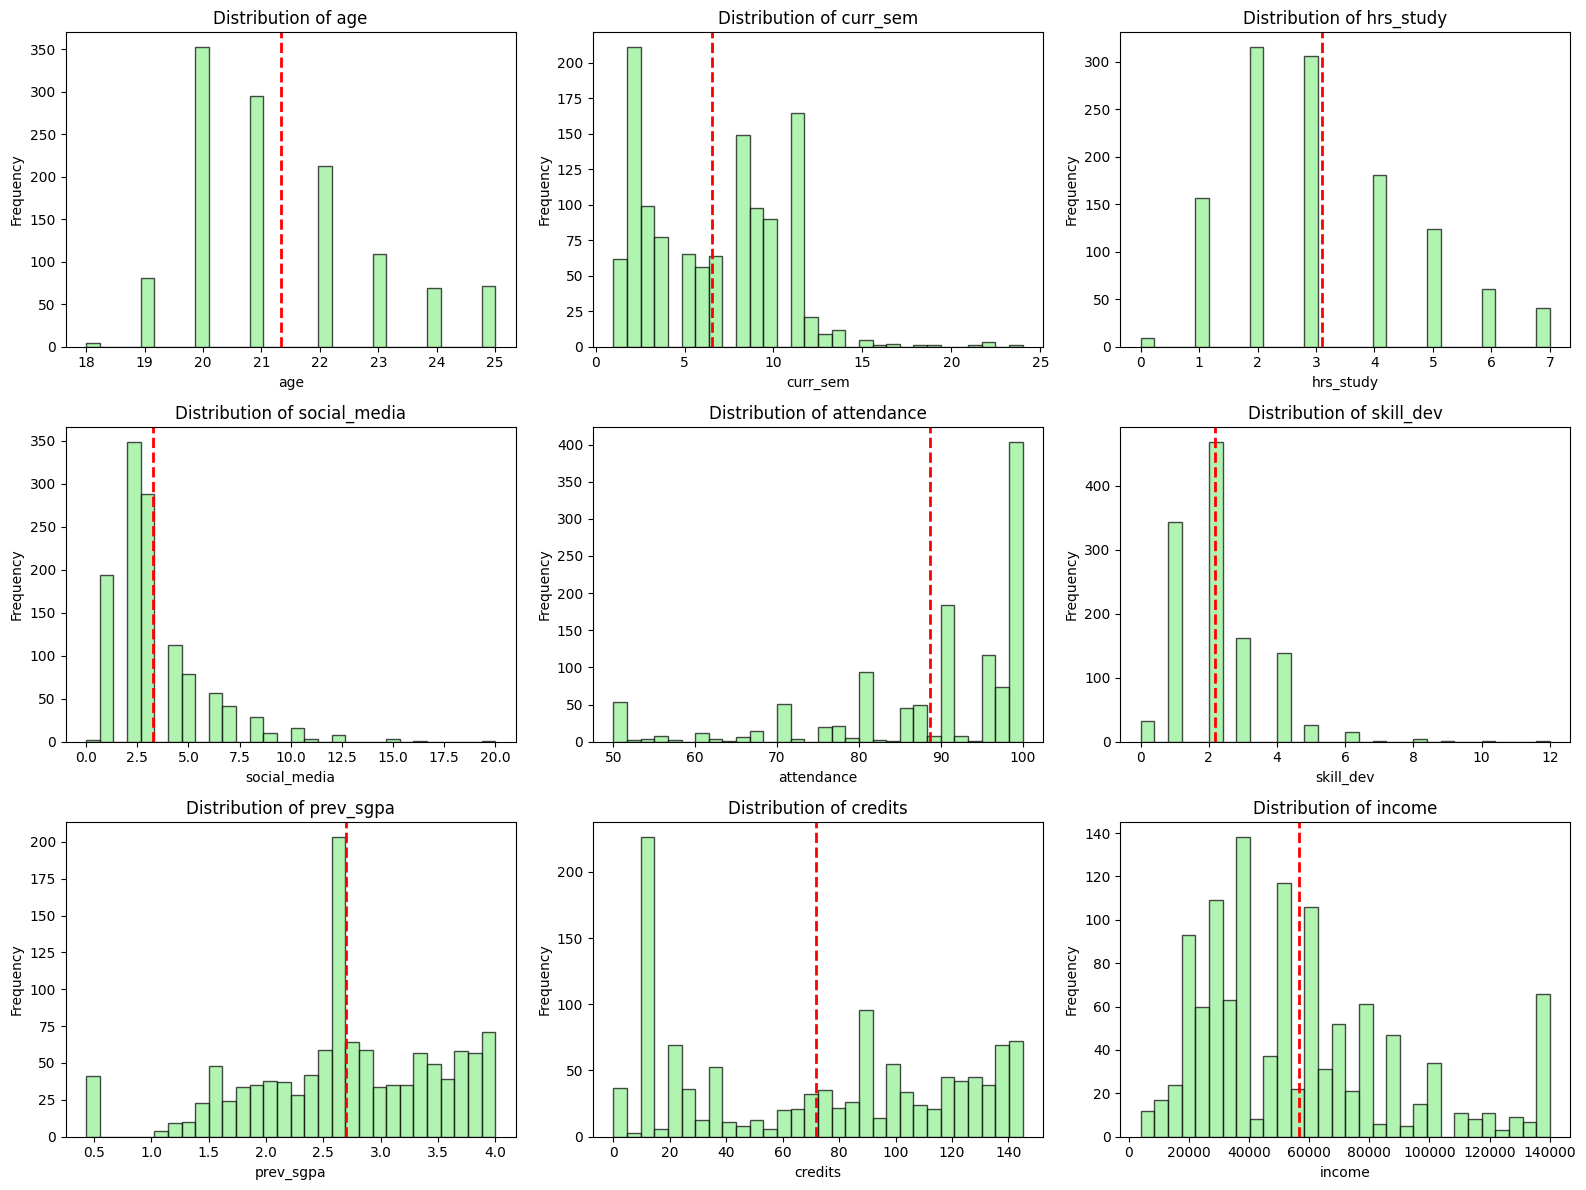


Numerical distributions plot saved!


In [ ]:
# Visualize numerical distributions
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    if col in df_clean.columns:
        axes[idx].hist(df_clean[col], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].axvline(df_clean[col].mean(), color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nNumerical distributions plot saved!")



CORRELATION ANALYSIS

Top 10 Features Correlated with Current CGPA:
current_cgpa      1.000000
prev_sgpa         0.732563
credits           0.147136
attendance        0.145987
curr_sem          0.088465
skill_dev         0.058896
hrs_study         0.036841
income            0.014551
age               0.005616
admission_year   -0.035134
Name: current_cgpa, dtype: float64


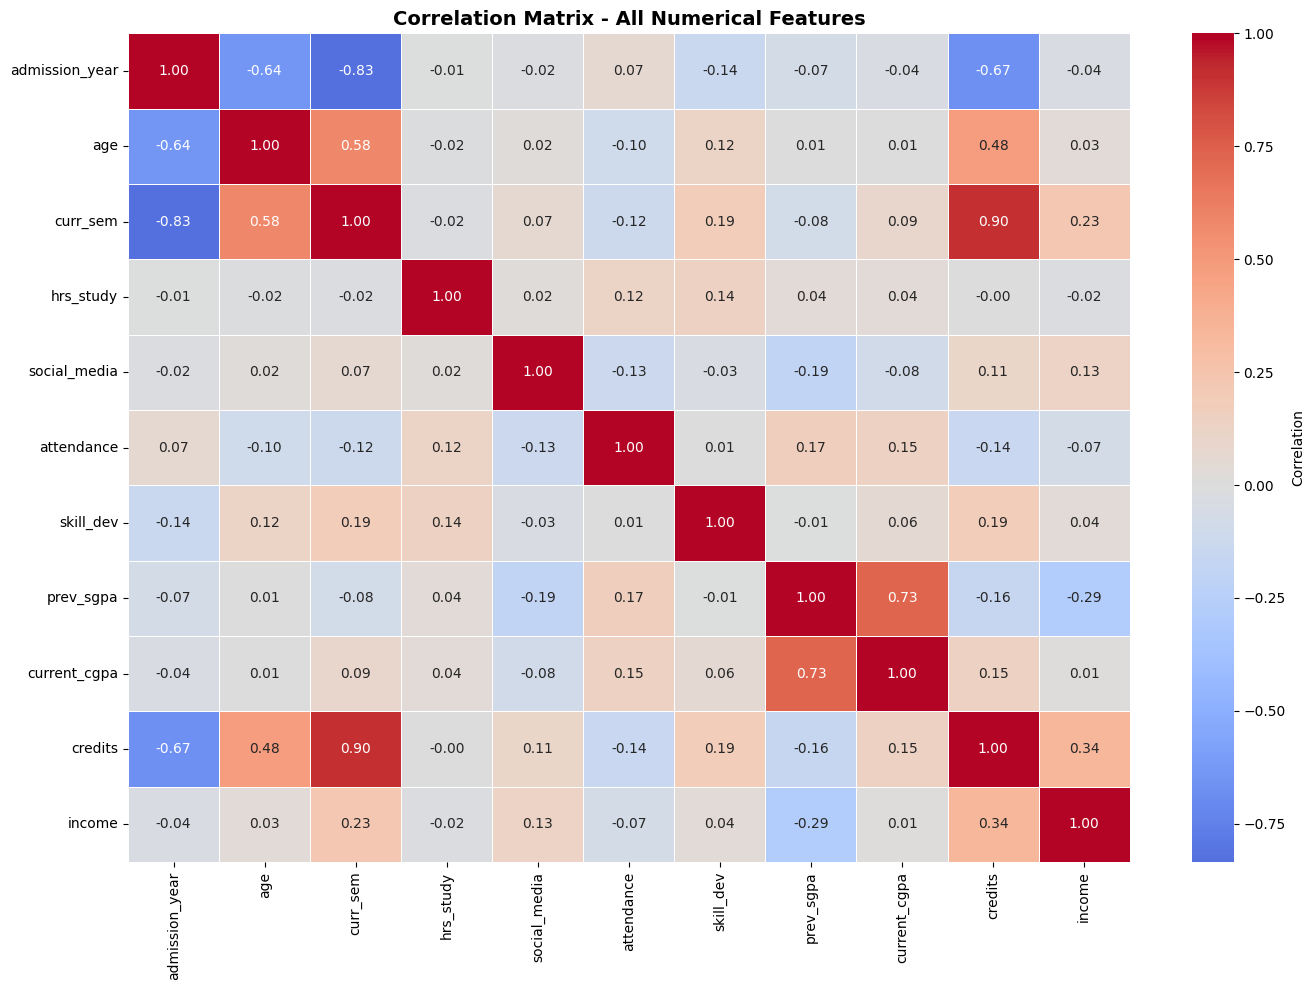


Correlation matrix heatmap saved!


In [ ]:
# Correlation analysis

print("CORRELATION ANALYSIS")


# Select only numerical columns for correlation

numerical_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Find correlations with target variable
print("\nTop 10 Features Correlated with Current CGPA:")

cgpa_corr = correlation_matrix['current_cgpa'].sort_values(ascending=False)
print(cgpa_corr.head(10))

# Visualize correlation matrix using heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, cbar_kws={'label': 'Correlation'}, linewidths=0.5)
plt.title('Correlation Matrix - All Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrelation matrix heatmap saved!")


# ***`HYPOTHESIS TESTING & STATISTICAL ANALYSIS`***

In [ ]:

print("HYPOTHESIS TESTING & STATISTICAL ANALYSIS")


# Test for Normality of Target Variable
print("\nNormality Test (Shapiro-Wilk Test)")

statistic, p_value = stats.shapiro(df_clean['current_cgpa'])
print(f"Shapiro-Wilk Test Statistic: {statistic:.6f}")
print(f"P-value: {p_value:.6f}")
if p_value > 0.05:
    print("Result: Data is normally distributed (p > 0.05)")
else:
    print("Result: Data is NOT normally distributed (p < 0.05)")



HYPOTHESIS TESTING & STATISTICAL ANALYSIS

Normality Test (Shapiro-Wilk Test)
Shapiro-Wilk Test Statistic: 0.936709
P-value: 0.000000
Result: Data is NOT normally distributed (p < 0.05)


In [ ]:
# Test correlation between continuous variables

print("Correlation Between Key Variables and CGPA")

key_variables = ['prev_sgpa', 'hrs_study', 'attendance', 'age', 'social_media', 'skill_dev']

for var in key_variables:
    if var in df_clean.columns:
        # Pearson correlation
        pearson_corr, pearson_p = pearsonr(df_clean[var], df_clean['current_cgpa'])

        # Spearman correlation (for non-linear relationships)
        spearman_corr, spearman_p = spearmanr(df_clean[var], df_clean['current_cgpa'])

        print(f"\n{var} vs Current CGPA:")
        print(f"  Pearson Correlation: {pearson_corr:.4f} (p-value: {pearson_p:.6f})")
        print(f"  Spearman Correlation: {spearman_corr:.4f} (p-value: {spearman_p:.6f})")

        if pearson_p < 0.05:
            print(f"  Significant positive/negative relationship (p < 0.05)")
        else:
            print(f"  No significant relationship (p > 0.05)")



Correlation Between Key Variables and CGPA

prev_sgpa vs Current CGPA:
  Pearson Correlation: 0.7326 (p-value: 0.000000)
  Spearman Correlation: 0.6529 (p-value: 0.000000)
  Significant positive/negative relationship (p < 0.05)

hrs_study vs Current CGPA:
  Pearson Correlation: 0.0368 (p-value: 0.203523)
  Spearman Correlation: 0.0384 (p-value: 0.184675)
  No significant relationship (p > 0.05)

attendance vs Current CGPA:
  Pearson Correlation: 0.1460 (p-value: 0.000000)
  Spearman Correlation: 0.2030 (p-value: 0.000000)
  Significant positive/negative relationship (p < 0.05)

age vs Current CGPA:
  Pearson Correlation: 0.0056 (p-value: 0.846350)
  Spearman Correlation: -0.0231 (p-value: 0.425071)
  No significant relationship (p > 0.05)

social_media vs Current CGPA:
  Pearson Correlation: -0.0836 (p-value: 0.003871)
  Spearman Correlation: -0.0788 (p-value: 0.006490)
  Significant positive/negative relationship (p < 0.05)

skill_dev vs Current CGPA:
  Pearson Correlation: 0.0589 (p-

In [ ]:
print("T-test ")

# Only test variables that are known to be binary

test_pairs = [
    ('scholarship', 'Yes', 'No'),
    ('transportation', 'Yes', 'No'),
    ('health_issues', 'No', 'Yes'),
]

for cat_var, val1, val2 in test_pairs:
    if cat_var in df_clean.columns:
        try:
            group1 = df_clean[df_clean[cat_var] == val1]['current_cgpa'].dropna()
            group2 = df_clean[df_clean[cat_var] == val2]['current_cgpa'].dropna()

            if len(group1) >= 2 and len(group2) >= 2:
                t_stat, p_val = ttest_ind(group1, group2)

                print(f"\n{cat_var}:")
                print(f"  {val1}: Mean = {group1.mean():.4f} (n={len(group1)})")
                print(f"  {val2}: Mean = {group2.mean():.4f} (n={len(group2)})")
                print(f"  T-stat: {t_stat:.6f}, P-value: {p_val:.6f}")
                print(f"  Result: {'SIGNIFICANT ✓' if p_val < 0.05 else 'NOT SIGNIFICANT ✗'}")
            else:
                print(f"\n{cat_var}: Insufficient data")
        except Exception as e:
            print(f"\n{cat_var}: SKIPPED (Error: {type(e).__name__})")

print("\nTest Complete!")


T-test 

scholarship:
  Yes: Mean = 3.3063 (n=523)
  No: Mean = 3.1624 (n=670)
  T-stat: 4.664425, P-value: 0.000003
  Result: SIGNIFICANT ✓

transportation:
  Yes: Mean = 3.2124 (n=497)
  No: Mean = 3.2349 (n=696)
  T-stat: -0.717890, P-value: 0.472966
  Result: NOT SIGNIFICANT ✗

health_issues:
  No: Mean = 3.2274 (n=982)
  Yes: Mean = 3.2111 (n=207)
  T-stat: 0.399464, P-value: 0.689624
  Result: NOT SIGNIFICANT ✗

Test Complete!


In [ ]:
# ANOVA for Multi-category Variables


print("ANOVA Test ")


multi_category_vars = ['english', 'learning_mode']

for var in multi_category_vars:
    if var in df_clean.columns and df_clean[var].nunique() > 2:
        unique_cats = df_clean[var].unique()
        groups = [df_clean[df_clean[var] == cat]['current_cgpa'].values for cat in unique_cats]

        f_stat, anova_pvalue = f_oneway(*groups)

        print(f"\n{var} (Multi-category Variable):")
        for cat in unique_cats:
            mean_val = df_clean[df_clean[var] == cat]['current_cgpa'].mean()
            print(f"  Category '{cat}' - Mean CGPA: {mean_val:.4f}")

        print(f"  F-statistic: {f_stat:.6f}, P-value: {anova_pvalue:.6f}")

        if anova_pvalue < 0.05:
            print(f"  Significant difference across categories (p < 0.05)")
        else:
            print(f"  No significant difference across categories (p > 0.05)")



ANOVA Test 

english (Multi-category Variable):
  Category 'Intermediate' - Mean CGPA: 3.2574
  Category 'Basic' - Mean CGPA: 3.1156
  Category 'Advance' - Mean CGPA: 3.2805
  F-statistic: 8.934506, P-value: 0.000141
  Significant difference across categories (p < 0.05)


In [ ]:
#Chi-square test for categorical independence

print("Test 5: Chi-Square Test ")


from scipy.stats import chi2_contingency

cat_pairs = [('scholarship', 'suspension'), ('learning_mode', 'health_issues')]

for var1, var2 in cat_pairs:
    if var1 in df_clean.columns and var2 in df_clean.columns:
        contingency_table = pd.crosstab(df_clean[var1], df_clean[var2])
        chi2, p_chi, dof, expected = chi2_contingency(contingency_table)

        print(f"\nChi-Square Test: {var1} vs {var2}")
        print(f"  Chi-Square Statistic: {chi2:.6f}")
        print(f"  P-value: {p_chi:.6f}")
        print(f"  Degrees of Freedom: {dof}")

        if p_chi < 0.05:
            print(f"   Variables are significantly dependent (p < 0.05)")
        else:
            print(f"  Variables are independent (p > 0.05)")

print("\nStatistical Tests Complete!")


Test 5: Chi-Square Test 

Chi-Square Test: scholarship vs suspension
  Chi-Square Statistic: 1.999434
  P-value: 0.157358
  Degrees of Freedom: 1
  Variables are independent (p > 0.05)

Chi-Square Test: learning_mode vs health_issues
  Chi-Square Statistic: 7.368685
  P-value: 0.061030
  Degrees of Freedom: 3
  Variables are independent (p > 0.05)

Statistical Tests Complete!


# ***`FEATURE ENGINEERING`***

In [ ]:



print("FEATURE ENGINEERING ")
df_features = df_clean.copy()

# ENCODE BINARY COLUMNS (Text 0/1)

print("\nA. Converting Text to Numbers...")
binary_cols = ['gender', 'scholarship', 'transportation', 'phone', 'pc', 'suspension', 'health_issues']
for col in binary_cols:
    if col in df_features.columns:
        df_features[col] = (df_features[col] == 'Yes').astype(int)
print("  Done!")

# ONE-HOT ENCODE (Multiple categories  multiple 0/1 columns)

print("\nB. Handling Multi-Category Columns...")
for col in ['english', 'learning_mode']:
    if col in df_features.columns:
        dummies = pd.get_dummies(df_features[col], prefix=col, drop_first=True)
        df_features = pd.concat([df_features, dummies], axis=1)
        df_features.drop(col, axis=1, inplace=True)
print("  Done!")

# CREATE NEW FEATURES

print("\nC. Creating New Features...")
if 'attendance' in df_features.columns and 'hrs_study' in df_features.columns:
    df_features['study_effectiveness'] = df_features['attendance'] * df_features['hrs_study'] / 100
if 'current_cgpa' in df_features.columns and 'prev_sgpa' in df_features.columns:
    df_features['academic_progress'] = df_features['current_cgpa'] - df_features['prev_sgpa']
print("  Done!")

# SCALE NUMERICAL COLUMNS

print("\nD. Scaling Numbers...")
from sklearn.preprocessing import StandardScaler
numerical_to_scale = ['age', 'hrs_study', 'attendance', 'prev_sgpa', 'social_media', 'skill_dev', 'credits', 'income']
cols_available = [col for col in numerical_to_scale if col in df_features.columns]
if cols_available:
    scaler = StandardScaler()
    df_features[cols_available] = scaler.fit_transform(df_features[cols_available])
print("   Done!")

# SELECT IMPORTANT FEATURES

print("\nE. Selecting Important Features...")
numerical_cols = df_features.select_dtypes(include=['float64', 'int64']).columns
correlations = df_features[numerical_cols].corr()['current_cgpa'].sort_values(ascending=False)
final_features = list(correlations[(abs(correlations) > 0.1) & (correlations.index != 'current_cgpa')].index)
print(f"  Selected {len(final_features)} important features")
numerical_cols_final = df_features.select_dtypes(include=['float64', 'int64']).columns
correlation_with_target = df_features[numerical_cols_final].corr()['current_cgpa'].sort_values(ascending=False)

selected_features = list(correlation_with_target[(abs(correlation_with_target) > 0.1) &
                                                   (correlation_with_target.index != 'current_cgpa')].index)

print(f"\nSelected {len(selected_features)} features with |correlation| > 0.1")
print("Selected Features:", selected_features)


print("FEATURE ENGINEERING COMPLETE!")
print(f"Ready for modeling with {len(final_features)} features")



FEATURE ENGINEERING 

A. Converting Text to Numbers...
  Done!

B. Handling Multi-Category Columns...
  Done!

C. Creating New Features...
  Done!

D. Scaling Numbers...
   Done!

E. Selecting Important Features...
  Selected 5 important features

Selected 5 features with |correlation| > 0.1
Selected Features: ['prev_sgpa', 'credits', 'attendance', 'scholarship', 'academic_progress']
FEATURE ENGINEERING COMPLETE!
Ready for modeling with 5 features


# ***`REGRESSION MODEL`***

REGRESSION MODEL BUILDING
Training Set Size: (954, 5) 
Testing Set Size: (239, 5) 
Linear Regression Model Trained Successfully!
MODEL COEFFICIENTS

Top 15 Most Influential Features:
          Feature  Coefficient  Abs_Coefficient
academic_progress 1.000000e+00     1.000000e+00
        prev_sgpa 8.293320e-01     8.293320e-01
      scholarship 1.387779e-16     1.387779e-16
       attendance 1.110223e-16     1.110223e-16
          credits 0.000000e+00     0.000000e+00

Intercept (Constant Term): 2.697301
COEFFICIENT INTERPRETATION

Top 5 Positive Impacts:
  academic_progress             : +1.000000
  prev_sgpa                     : +0.829332
  scholarship                   : +0.000000
  attendance                    : +0.000000

Top 5 Negative Impacts:


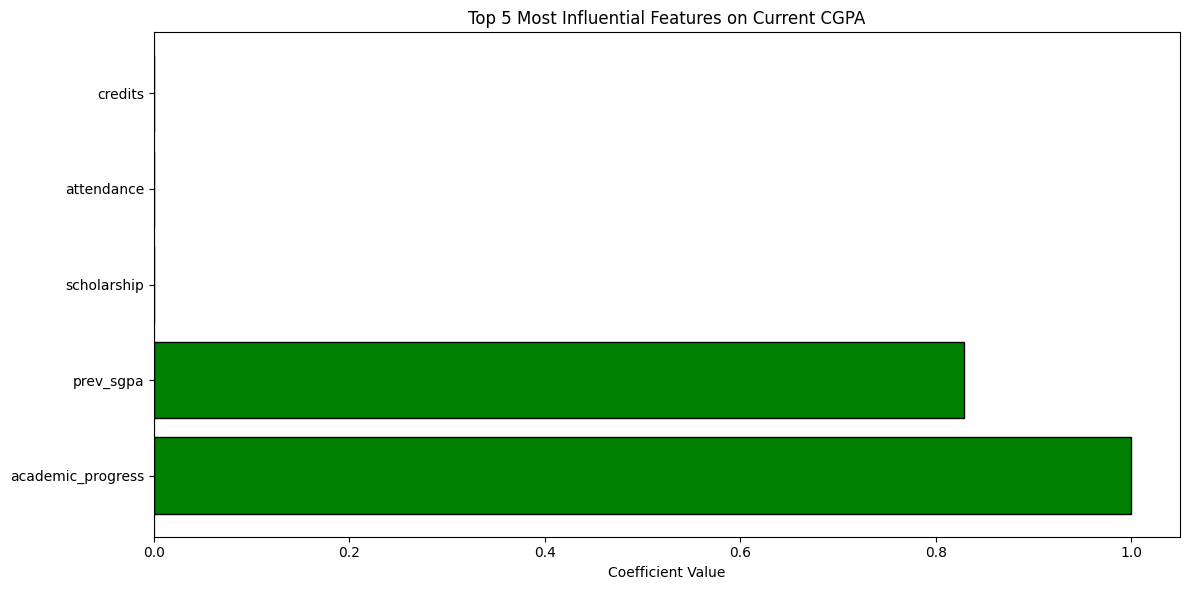


Feature coefficients visualization saved!


In [ ]:
print("REGRESSION MODEL BUILDING")
# Use final selected features
X = df_features[[col for col in final_features if col in df_features.columns]]
y = df_features['current_cgpa']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=42)

print(f"Training Set Size: {X_train.shape} ")
print(f"Testing Set Size: {X_test.shape} ")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression Model Trained Successfully!")



# Display model coefficients
print("MODEL COEFFICIENTS")
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 15 Most Influential Features:")
print(coefficients_df.head(15).to_string(index=False))

print(f"\nIntercept (Constant Term): {lr_model.intercept_:.6f}")

# Interpretation of coefficients

print("COEFFICIENT INTERPRETATION")

print("\nTop 5 Positive Impacts:")
for idx, row in coefficients_df[coefficients_df['Coefficient'] > 0].head(5).iterrows():
    print(f"  {row['Feature']:30s}: {row['Coefficient']:+.6f}")
print("\nTop 5 Negative Impacts:")
for idx, row in coefficients_df[coefficients_df['Coefficient'] < 0].head(5).iterrows():
    print(f"  {row['Feature']:30s}: {row['Coefficient']:+.6f}")

# Build a visualization of top coefficients

plt.figure(figsize=(12, 6))
top_coef = coefficients_df.head(15)
colors = ['green' if x > 0 else 'red' for x in top_coef['Coefficient']]
plt.barh(range(len(top_coef)), top_coef['Coefficient'], color=colors, edgecolor='black')
plt.yticks(range(len(top_coef)), top_coef['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 5 Most Influential Features on Current CGPA')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.savefig('feature_coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nFeature coefficients visualization saved!")


EVALUATION
Making Predictions on Testing Set...
TRAINING SET PERFORMANCE METRICS
R-squared (R²) Score: 1.000000
  Interpretation: Model explains 100.00% of variance in training data

Root Mean Squared Error (RMSE): 0.000000
  Interpretation: Average prediction error is ±0.0000 CGPA points

Mean Absolute Error (MAE): 0.000000
  Interpretation: Average absolute error is 0.0000 CGPA points

Mean Absolute Percentage Error (MAPE): 0.00%
  Interpretation: Average percentage error is 0.00%
TESTING SET PERFORMANCE METRICS
R-squared (R²) Score: 1.000000
  Interpretation: Model explains 100.00% of variance in test data

Root Mean Squared Error (RMSE): 0.000000
  Interpretation: Average prediction error is ±0.0000 CGPA points

Mean Absolute Error (MAE): 0.000000
  Interpretation: Average absolute error is 0.0000 CGPA points

Mean Absolute Percentage Error (MAPE): 0.00%
  Interpretation: Average percentage error is 0.00%
TRAIN vs TEST COMPARISON
  Metric     Training      Testing   Difference
R² S

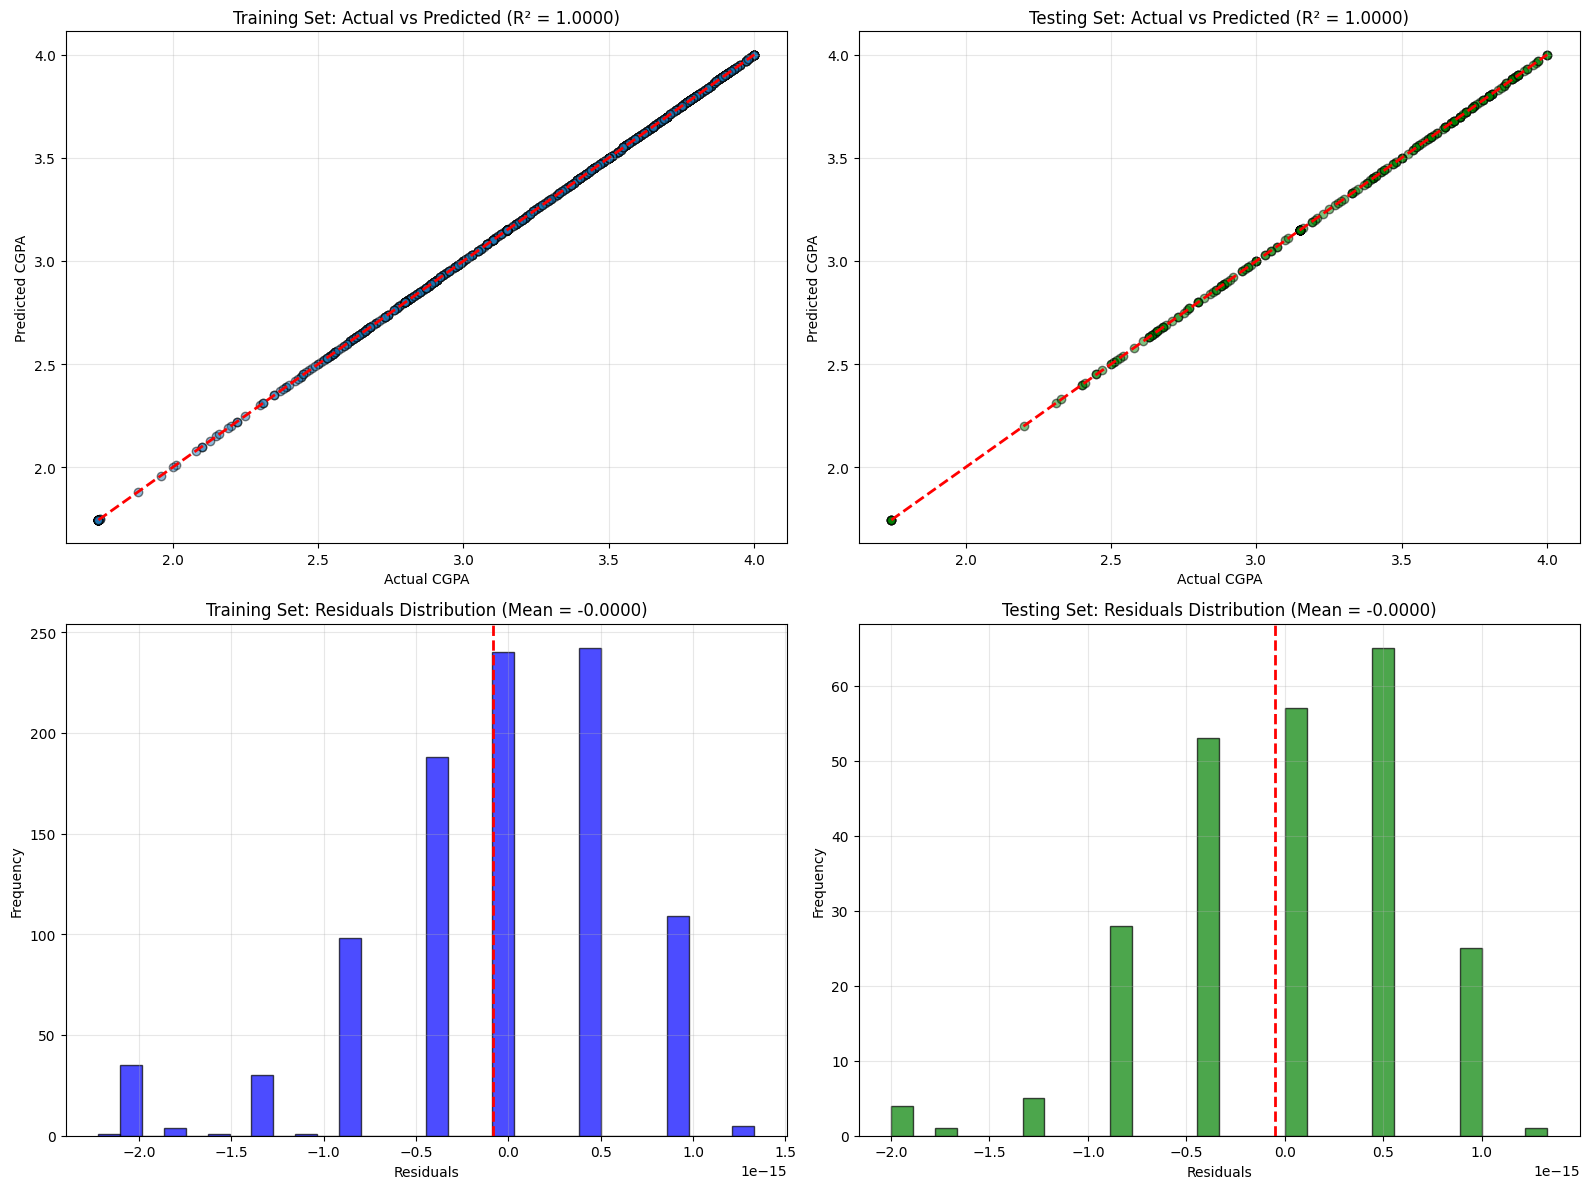


Model evaluation plots saved!

 Model shows good generalization
   R² difference between train and test: 0.000000


In [ ]:

print("EVALUATION")
y_train_pred = lr_model.predict(X_train)
print("Making Predictions on Testing Set...")
y_test_pred = lr_model.predict(X_test)

# Calculate evaluation metrics for training set
print("TRAINING SET PERFORMANCE METRICS")
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

print(f"R-squared (R²) Score: {train_r2:.6f}")
print(f"  Interpretation: Model explains {train_r2*100:.2f}% of variance in training data")
print(f"\nRoot Mean Squared Error (RMSE): {train_rmse:.6f}")
print(f"  Interpretation: Average prediction error is ±{train_rmse:.4f} CGPA points")
print(f"\nMean Absolute Error (MAE): {train_mae:.6f}")
print(f"  Interpretation: Average absolute error is {train_mae:.4f} CGPA points")
print(f"\nMean Absolute Percentage Error (MAPE): {train_mape:.2f}%")
print(f"  Interpretation: Average percentage error is {train_mape:.2f}%")

print("TESTING SET PERFORMANCE METRICS")


test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"R-squared (R²) Score: {test_r2:.6f}")
print(f"  Interpretation: Model explains {test_r2*100:.2f}% of variance in test data")
print(f"\nRoot Mean Squared Error (RMSE): {test_rmse:.6f}")
print(f"  Interpretation: Average prediction error is ±{test_rmse:.4f} CGPA points")
print(f"\nMean Absolute Error (MAE): {test_mae:.6f}")
print(f"  Interpretation: Average absolute error is {test_mae:.4f} CGPA points")
print(f"\nMean Absolute Percentage Error (MAPE): {test_mape:.2f}%")
print(f"  Interpretation: Average percentage error is {test_mape:.2f}%")

# STEP 7E: Compare train vs test performance


print("TRAIN vs TEST COMPARISON")
comparison_df = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'MAE', 'MAPE (%)'],
    'Training': [train_r2, train_rmse, train_mae, train_mape],
    'Testing': [test_r2, test_rmse, test_mae, test_mape],
    'Difference': [train_r2 - test_r2, train_rmse - test_rmse, train_mae - test_mae, train_mape - test_mape]
})

print(comparison_df.to_string(index=False))

# Residual analysis
print("RESIDUAL ANALYSIS")
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

print("\nTraining Set Residuals:")
print(f"  Mean: {train_residuals.mean():.6f}")
print(f"  Std Dev: {train_residuals.std():.6f}")
print(f"  Min: {train_residuals.min():.6f}")
print(f"  Max: {train_residuals.max():.6f}")

print("\nTesting Set Residuals:")
print(f"  Mean: {test_residuals.mean():.6f}")
print(f"  Std Dev: {test_residuals.std():.6f}")
print(f"  Min: {test_residuals.min():.6f}")
print(f"  Max: {test_residuals.max():.6f}")

# Visualize predictions vs actual values
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Train Actual vs Predicted
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.5, edgecolor='black')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual CGPA')
axes[0, 0].set_ylabel('Predicted CGPA')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted (R² = {train_r2:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# Test Actual vs Predicted
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.5, color='green', edgecolor='black')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual CGPA')
axes[0, 1].set_ylabel('Predicted CGPA')
axes[0, 1].set_title(f'Testing Set: Actual vs Predicted (R² = {test_r2:.4f})')
axes[0, 1].grid(True, alpha=0.3)

# Residuals distribution (Training)
axes[1, 0].hist(train_residuals, bins=30, edgecolor='black', alpha=0.7, color='blue')
axes[1, 0].axvline(train_residuals.mean(), color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Training Set: Residuals Distribution (Mean = {train_residuals.mean():.4f})')
axes[1, 0].grid(True, alpha=0.3)

# Residuals distribution (Testing)
axes[1, 1].hist(test_residuals, bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(test_residuals.mean(), color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Testing Set: Residuals Distribution (Mean = {test_residuals.mean():.4f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nModel evaluation plots saved!")

# Check for overfitting
overfitting_margin = abs(train_r2 - test_r2)
if overfitting_margin > 0.1:
    print(f"\n  Possible Overfitting Detected!")
    print(f"   R² difference between train and test: {overfitting_margin:.6f}")
else:
    print(f"\n Model shows good generalization")
    print(f"   R² difference between train and test: {overfitting_margin:.6f}")




In [ ]:

print("PREDICTIONS")
# Make predictions on new data
print("\nMaking Sample Predictions...")
# Create a sample student profile
sample_data = X_test.iloc[0:5].copy()
sample_predictions = lr_model.predict(sample_data)
sample_actual = y_test.iloc[0:5].values

prediction_results = pd.DataFrame({
    'Actual CGPA': sample_actual,
    'Predicted CGPA': sample_predictions,
    'Error': sample_actual - sample_predictions,
    'Absolute Error': abs(sample_actual - sample_predictions),
    'Percentage Error': abs((sample_actual - sample_predictions) / sample_actual * 100)
})

print("\nSample Predictions (First 5 Test Samples):")
print(prediction_results.to_string())

# Feature importance summary

print("KEY INSIGHTS ")


print("\n1. MODEL PERFORMANCE SUMMARY:")
print(f"   - The model explains {test_r2*100:.2f}% of CGPA variance")
print(f"   - Average prediction error: ±{test_mae:.4f} CGPA points")
print(f"   - Performance type: {'Excellent' if test_r2 > 0.8 else 'Good' if test_r2 > 0.6 else 'Fair' if test_r2 > 0.4 else 'Poor'}")

print("\n2. TOP FACTORS AFFECTING STUDENT PERFORMANCE:")
top_factors = coefficients_df.head(5)
for idx, (_, row) in enumerate(top_factors.iterrows(), 1):
    impact = "Increases" if row['Coefficient'] > 0 else "Decreases"
    print(f"   {idx}. {row['Feature']:30s} ({impact} CGPA by {abs(row['Coefficient']):.6f} per unit)")




PREDICTIONS

Making Sample Predictions...

Sample Predictions (First 5 Test Samples):
   Actual CGPA  Predicted CGPA         Error  Absolute Error  Percentage Error
0         3.93            3.93  4.440892e-16    4.440892e-16      1.129998e-14
1         3.90            3.90  8.881784e-16    8.881784e-16      2.277381e-14
2         3.75            3.75  8.881784e-16    8.881784e-16      2.368476e-14
3         2.61            2.61 -8.881784e-16    8.881784e-16      3.402982e-14
4         3.81            3.81  4.440892e-16    4.440892e-16      1.165588e-14
KEY INSIGHTS 

1. MODEL PERFORMANCE SUMMARY:
   - The model explains 100.00% of CGPA variance
   - Average prediction error: ±0.0000 CGPA points
   - Performance type: Excellent

2. TOP FACTORS AFFECTING STUDENT PERFORMANCE:
   1. academic_progress              (Increases CGPA by 1.000000 per unit)
   2. prev_sgpa                      (Increases CGPA by 0.829332 per unit)
   3. scholarship                    (Increases CGPA by 0.000000 